In [224]:
import re #pacchetto per espressioni regolari
import os #pacchetto per muoversi nelle cartelle
import sys
sys.path.append('..')  # Add parent directory to the Python path
from utils.helpers import *


In [225]:
conllu_dir = 'data/profiling_output/11226/'

In [226]:
all_documents = []
for file_name in os.listdir(conllu_dir):
    file_path = os.path.join(conllu_dir, file_name)
    document = Document(file_path)
    load_document_sentences(document)
    all_documents.append(document)

In [227]:
sample_document = all_documents[0]
for sentence in sample_document.sentences[:2]:
    tokens = [token.word for token in sentence.tokens]
    print(' - '.join(tokens))
    print('\n_________________\n')

Ho - appena - visto - l' - ultima - puntata - e - quando - ho - iniziato - sta - serie - tv - frank - mi - faceva - ridere - ora - mi - fa - solo - incazzare - .

_________________

#shameless - #6x12

_________________



In [228]:
extract_documents_ngrams(all_documents)

In [229]:
sample_document.features

{'WORD_1_Ho': 1,
 'WORD_1_appena': 1,
 'WORD_1_visto': 1,
 "WORD_1_l'": 1,
 'WORD_1_ultima': 1,
 'WORD_1_puntata': 1,
 'WORD_1_e': 1,
 'WORD_1_quando': 1,
 'WORD_1_ho': 1,
 'WORD_1_iniziato': 1,
 'WORD_1_sta': 1,
 'WORD_1_serie': 1,
 'WORD_1_tv': 1,
 'WORD_1_frank': 1,
 'WORD_1_mi': 2,
 'WORD_1_faceva': 1,
 'WORD_1_ridere': 1,
 'WORD_1_ora': 1,
 'WORD_1_fa': 1,
 'WORD_1_solo': 1,
 'WORD_1_incazzare': 1,
 'WORD_1_.': 1,
 'WORD_2_Ho_appena': 1,
 'WORD_2_appena_visto': 1,
 "WORD_2_visto_l'": 1,
 "WORD_2_l'_ultima": 1,
 'WORD_2_ultima_puntata': 1,
 'WORD_2_puntata_e': 1,
 'WORD_2_e_quando': 1,
 'WORD_2_quando_ho': 1,
 'WORD_2_ho_iniziato': 1,
 'WORD_2_iniziato_sta': 1,
 'WORD_2_sta_serie': 1,
 'WORD_2_serie_tv': 1,
 'WORD_2_tv_frank': 1,
 'WORD_2_frank_mi': 1,
 'WORD_2_mi_faceva': 1,
 'WORD_2_faceva_ridere': 1,
 'WORD_2_ridere_ora': 1,
 'WORD_2_ora_mi': 1,
 'WORD_2_mi_fa': 1,
 'WORD_2_fa_solo': 1,
 'WORD_2_solo_incazzare': 1,
 'WORD_2_incazzare_.': 1,
 'CHAR_1_H': 1,
 'CHAR_1_o': 8,
 'CHAR

In [230]:
extract_documents_ngrams_normalized(all_documents)


In [231]:
def train_test_split(all_documents):
    train_features_dict, train_labels = [], []
    test_features_dict, test_labels = [], []
    
    for document in all_documents:
        if document.split == 'training':
            train_features_dict.append(document.features)
            train_labels.append(document.gender)
        else:
            test_features_dict.append(document.features)
            test_labels.append(document.gender)
    
    return train_features_dict, train_labels, test_features_dict, test_labels

In [232]:
train_features_dict, train_labels, test_features_dict, test_labels = train_test_split(all_documents)

In [233]:
len(train_features_dict), len(train_labels), len(test_features_dict), len(test_labels)


(739, 739, 770, 770)

In [234]:
get_num_features(train_features_dict)
print(f'Numero features: {get_num_features(train_features_dict)}')

Numero features: 19573


In [235]:
#train_features_dict = filter_features(train_features_dict, 5)
#print(f'Numero features dopo il filtro: {get_num_features(train_features_dict)}')

In [236]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_features_dict)

In [237]:
vectorizer.get_feature_names_out(X_train).tolist()

['CHAR_1_ ',
 'CHAR_1_!',
 'CHAR_1_"',
 'CHAR_1_#',
 'CHAR_1_%',
 'CHAR_1_&',
 "CHAR_1_'",
 'CHAR_1_(',
 'CHAR_1_)',
 'CHAR_1_*',
 'CHAR_1_+',
 'CHAR_1_,',
 'CHAR_1_-',
 'CHAR_1_.',
 'CHAR_1_/',
 'CHAR_1_0',
 'CHAR_1_1',
 'CHAR_1_2',
 'CHAR_1_3',
 'CHAR_1_4',
 'CHAR_1_5',
 'CHAR_1_6',
 'CHAR_1_7',
 'CHAR_1_8',
 'CHAR_1_9',
 'CHAR_1_:',
 'CHAR_1_;',
 'CHAR_1_<',
 'CHAR_1_=',
 'CHAR_1_>',
 'CHAR_1_?',
 'CHAR_1_@',
 'CHAR_1_A',
 'CHAR_1_B',
 'CHAR_1_C',
 'CHAR_1_D',
 'CHAR_1_E',
 'CHAR_1_F',
 'CHAR_1_G',
 'CHAR_1_H',
 'CHAR_1_I',
 'CHAR_1_J',
 'CHAR_1_K',
 'CHAR_1_L',
 'CHAR_1_M',
 'CHAR_1_N',
 'CHAR_1_O',
 'CHAR_1_P',
 'CHAR_1_Q',
 'CHAR_1_R',
 'CHAR_1_S',
 'CHAR_1_T',
 'CHAR_1_U',
 'CHAR_1_V',
 'CHAR_1_W',
 'CHAR_1_X',
 'CHAR_1_Y',
 'CHAR_1_Z',
 'CHAR_1__',
 'CHAR_1_a',
 'CHAR_1_b',
 'CHAR_1_c',
 'CHAR_1_d',
 'CHAR_1_e',
 'CHAR_1_f',
 'CHAR_1_g',
 'CHAR_1_h',
 'CHAR_1_i',
 'CHAR_1_j',
 'CHAR_1_k',
 'CHAR_1_l',
 'CHAR_1_m',
 'CHAR_1_n',
 'CHAR_1_o',
 'CHAR_1_p',
 'CHAR_1_q',
 'CHAR_1_r',

In [238]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 0.01, 0.001],  # Regularization parameter
    'dual': [True, False]
}

# Initialize SVM with linear kernel
svc = LinearSVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, refit=True)

# Fit the grid search to your data
grid_search.fit(X_train, train_labels)

# Get mean test scores across folds
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

Best parameters found: {'C': 0.001, 'dual': True}
Best score found: 0.5331035116749402


In [240]:
X_test = vectorizer.transform(test_features_dict)
X_test = scaler.transform(X_test)

In [241]:
# Get the best estimator (model) found by grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model to make predictions on new data
# For example, if you have new data X_new, you can predict its labels as follows:
predictions = best_model.predict(X_test)

In [242]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
test_predictions = predictions
print(classification_report(test_labels, test_predictions, zero_division=0)) # output_dict=True

              precision    recall  f1-score   support

           F       0.55      0.75      0.63       396
           M       0.56      0.34      0.42       374

    accuracy                           0.55       770
   macro avg       0.55      0.54      0.53       770
weighted avg       0.55      0.55      0.53       770



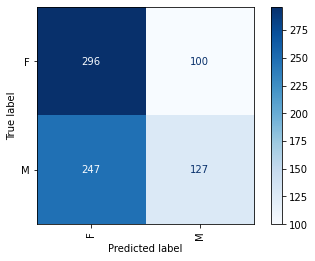

In [243]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='Blues')